# The Deep Learning Homework - Question No. 1  
Bahar Mahdavi - SN: 40152521337

# A. Unable to Learn XOR with a single layer perceptron (SLP)

# XOR Truth Table:

In [1]:
# first way
for A in [0, 1]:
    for B in [0, 1]:
        print("{} XOR {} = {}".format(A, B, A ^ B))

0 XOR 0 = 0
0 XOR 1 = 1
1 XOR 0 = 1
1 XOR 1 = 0


In [2]:
# second way
def XOR (A, B): 
    if A != B: 
        return 1
    else: 
        return 0 
print("|-------------------------|")
print("|        XOR GATE         |")  
print("|-------------------------|")      
print("|   A   |   B   |    X    |") 
print("|_________________________|")       
print("|   0   |   0   |","  ",XOR(0,0) ,"   |")
print("|_________________________|")
print("|   0   |   1   |","  ",XOR(0,1) ,"   |")
print("|_________________________|")
print("|   1   |   0   |","  ",XOR(1,0) ,"   |")
print("|_________________________|")
print("|   1   |   1   |","  ",XOR(1,1) ,"   |")
print("|_________________________|")

|-------------------------|
|        XOR GATE         |
|-------------------------|
|   A   |   B   |    X    |
|_________________________|
|   0   |   0   |    0    |
|_________________________|
|   0   |   1   |    1    |
|_________________________|
|   1   |   0   |    1    |
|_________________________|
|   1   |   1   |    0    |
|_________________________|


# XOR Graph in 2-Dimensional Space:

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X1 = np.array ([0., 0., 1., 1.], dtype = np.float32)
X2 = np.array ([0., 1., 0., 1.], dtype = np.float32)
y = np.array ([0., 1., 1., 0.], dtype = np.float32)

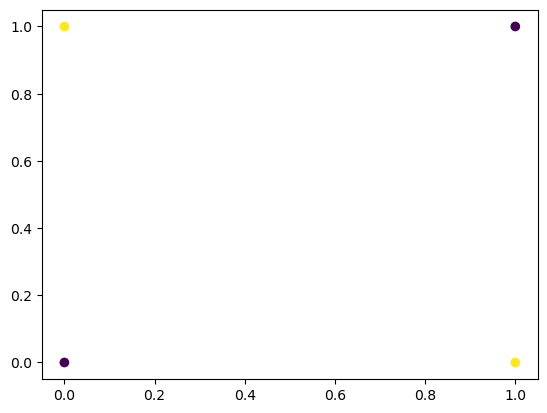

In [5]:
plt.scatter(X1, X2, c = y)

# Perceptron Model Without any Hidden Layers

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [7]:
# XOR definition
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]])
y = torch.FloatTensor([[0], [1], [1], [0]])

In [8]:
print(X)
print()
print(y)

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])

tensor([[0.],
        [1.],
        [1.],
        [0.]])


# Binary Cross Entropy: 
ℓ(x,y)=L={l1,…,lN}⊤,ln=−wn[yn⋅logxn+(1−yn)⋅log(1−xn)]

In [9]:
# perceptron model without hidden layer (Construction of network architecture by 2 input into 1 output)
linear = nn.Linear(2, 1, bias=True)
sigmoid = nn.Sigmoid()

model = nn.Sequential(linear, sigmoid) 

# another way: model = Sequential(Linear(2, 1), Sigmoid()) 

In [10]:
# define cost/loss & optimizer
criterion = nn.BCELoss() # Binary Cross Entropy Loss
optimizer = optim.SGD(model.parameters(), lr=0.1) # Stochastic Gradient Descent

In [11]:
for epoch in range(20000):
    pred = model(X)
    loss = criterion(pred, y) # cost/loss function
    
    optimizer.zero_grad() # remove current gradients for next iteration
    loss.backward() # backpropogate through the loss gradiants
    optimizer.step() # update model weights
    
    if epoch%1000==0:
        print('step:', epoch, " loss:", loss.item())

step: 0  loss: 0.8681239485740662
step: 1000  loss: 0.6931473016738892
step: 2000  loss: 0.6931471824645996
step: 3000  loss: 0.6931471824645996
step: 4000  loss: 0.6931471824645996
step: 5000  loss: 0.6931471824645996
step: 6000  loss: 0.6931471824645996
step: 7000  loss: 0.6931471824645996
step: 8000  loss: 0.6931471824645996
step: 9000  loss: 0.6931471824645996
step: 10000  loss: 0.6931471824645996
step: 11000  loss: 0.6931471824645996
step: 12000  loss: 0.6931471824645996
step: 13000  loss: 0.6931471824645996
step: 14000  loss: 0.6931471824645996
step: 15000  loss: 0.6931471824645996
step: 16000  loss: 0.6931471824645996
step: 17000  loss: 0.6931471824645996
step: 18000  loss: 0.6931471824645996
step: 19000  loss: 0.6931471824645996


In [12]:
pred = model(X)
print(pred)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)


In [13]:
# model evaluation
model.eval() 
answer = model(X)
for i in range(4):
    print("pridicted:", answer[i].item(), " label:", y[i].item())

pridicted: 0.5  label: 0.0
pridicted: 0.5  label: 1.0
pridicted: 0.5  label: 1.0
pridicted: 0.5  label: 0.0


# Mean Squared Error (L2 norm): 
ℓ(x,y)=L={l1,…,lN}⊤,ln=(xn−yn)2

In [14]:
# perceptron model without hidden layer (Construction of network architecture by 2 input into 1 output)
linear = nn.Linear(2, 1, bias=True)
sigmoid = nn.Sigmoid()

model = nn.Sequential(linear, sigmoid) 

# another way: model = Sequential(Linear(2, 1), Sigmoid()) 

In [15]:
# define cost/loss & optimizer
criterion = nn.MSELoss() # Mean Squared Error Loss
optimizer = optim.SGD(model.parameters(), lr=0.1) # Stochastic Gradient Descent

In [16]:
for epoch in range(20000):
    pred = model(X)
    loss = criterion(pred, y) # cost/loss function
    
    optimizer.zero_grad() # remove current gradients for next iteration
    loss.backward() # backpropogate through the loss gradiants
    optimizer.step() # update model weights
    
    if epoch%1000==0:
        print('step:', epoch, " loss:", loss.item())

step: 0  loss: 0.2858036756515503
step: 1000  loss: 0.25003403425216675
step: 2000  loss: 0.2500002384185791
step: 3000  loss: 0.25
step: 4000  loss: 0.25
step: 5000  loss: 0.25
step: 6000  loss: 0.25
step: 7000  loss: 0.25
step: 8000  loss: 0.25
step: 9000  loss: 0.25
step: 10000  loss: 0.25
step: 11000  loss: 0.25
step: 12000  loss: 0.25
step: 13000  loss: 0.25
step: 14000  loss: 0.25
step: 15000  loss: 0.25
step: 16000  loss: 0.25
step: 17000  loss: 0.25
step: 18000  loss: 0.25
step: 19000  loss: 0.25


In [17]:
pred = model(X)
print(pred)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)


In [18]:
# model evaluation
model.eval() 
answer = model(X)
for i in range(4):
    print("pridicted:", answer[i].item(), " label:", y[i].item())

pridicted: 0.5  label: 0.0
pridicted: 0.5  label: 1.0
pridicted: 0.5  label: 1.0
pridicted: 0.5  label: 0.0


# B. Sovling XOR problem with Multi-Layered Perceptron (MLP)

# Binary Cross Entropy: 
ℓ(x,y)=L={l1,…,lN}⊤,ln=−wn[yn⋅logxn+(1−yn)⋅log(1−xn)]

In [19]:
# MLP model
linear1 = nn.Linear(2, 2, bias=True)
linear2 = nn.Linear(2, 1, bias=True)
sigmoid = nn.Sigmoid()

model = nn.Sequential(linear1, sigmoid, linear2, sigmoid) 

In [20]:
# define cost/loss & optimizer
criterion = nn.BCELoss() # Binary Cross Entropy Loss
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum = 0.9) # Stochastic Gradient Descent

In [21]:
for epoch in range(20000):
    pred = model(X)
    loss = criterion(pred, y) # cost/loss function
        
    optimizer.zero_grad() # remove current gradients for next iteration
    loss.backward() # backpropogate through the loss gradiants
    optimizer.step() # update model weights

    if epoch % 1000 == 0:
        print('step:', epoch, 'loss:', loss.item())

step: 0 loss: 0.7050520181655884
step: 1000 loss: 0.024608919396996498
step: 2000 loss: 0.0069744521751999855
step: 3000 loss: 0.004019292537122965
step: 4000 loss: 0.002815140876919031
step: 5000 loss: 0.002163550816476345
step: 6000 loss: 0.0017556633101776242
step: 7000 loss: 0.0014766615349799395
step: 8000 loss: 0.0012737601064145565
step: 9000 loss: 0.0011197138810530305
step: 10000 loss: 0.000998747069388628
step: 11000 loss: 0.0009012568043544888
step: 12000 loss: 0.0008210614323616028
step: 13000 loss: 0.0007538916543126106
step: 14000 loss: 0.000696866656653583
step: 15000 loss: 0.0006478074938058853
step: 16000 loss: 0.0006051922682672739
step: 17000 loss: 0.0005678570014424622
step: 18000 loss: 0.0005347873084247112
step: 19000 loss: 0.0005053713684901595


In [22]:
pred = model(X)
print(pred)

tensor([[4.1543e-04],
        [9.9957e-01],
        [9.9957e-01],
        [6.4161e-04]], grad_fn=<SigmoidBackward0>)


In [23]:
# model evaluation
model.eval() 
answer = model(X)
for i in range(4):
    print("pridicted:", answer[i].item(), " label:", y[i].item())

pridicted: 0.0004154262423980981  label: 0.0
pridicted: 0.999570906162262  label: 1.0
pridicted: 0.9995706677436829  label: 1.0
pridicted: 0.0006416098913177848  label: 0.0


# Mean Squared Error (L2 norm): 
ℓ(x,y)=L={l1,…,lN}⊤,ln=(xn−yn)2

In [24]:
# MLP model
linear1 = nn.Linear(2, 2, bias=True)
linear2 = nn.Linear(2, 1, bias=True)
sigmoid = nn.Sigmoid()

model = nn.Sequential(linear1, sigmoid, linear2, sigmoid) 

In [25]:
# define cost/loss & optimizer
criterion = nn.MSELoss() # Mean Squared Error Loss
optimizer = optim.SGD(model.parameters(), lr=0.1) # Stochastic Gradient Descent

In [26]:
for epoch in range(20000):
    pred = model(X)
    loss = criterion(pred, y) # cost/loss function
    
    optimizer.zero_grad() # remove current gradients for next iteration
    loss.backward() # backpropogate through the loss gradiants
    optimizer.step() # update model weights
    
    if epoch%1000==0:
        print('step:', epoch, " loss:", loss.item())

step: 0  loss: 0.2556060254573822
step: 1000  loss: 0.24992229044437408
step: 2000  loss: 0.24984024465084076
step: 3000  loss: 0.2497112900018692
step: 4000  loss: 0.24947109818458557
step: 5000  loss: 0.24893847107887268
step: 6000  loss: 0.2474845051765442
step: 7000  loss: 0.24256888031959534
step: 8000  loss: 0.22560104727745056
step: 9000  loss: 0.18404020369052887
step: 10000  loss: 0.10402747988700867
step: 11000  loss: 0.04428241029381752
step: 12000  loss: 0.023126069456338882
step: 13000  loss: 0.014649526216089725
step: 14000  loss: 0.010425277054309845
step: 15000  loss: 0.007977471686899662
step: 16000  loss: 0.006407344713807106
step: 17000  loss: 0.00532560283318162
step: 18000  loss: 0.004540184512734413
step: 19000  loss: 0.003946664277464151


In [27]:
pred = model(X)
print(pred)

tensor([[0.0596],
        [0.9458],
        [0.9315],
        [0.0524]], grad_fn=<SigmoidBackward0>)


In [28]:
# model evaluation
model.eval() 
answer = model(X)
for i in range(4):
    print("pridicted:", answer[i].item(), " label:", y[i].item())

pridicted: 0.059634868055582047  label: 0.0
pridicted: 0.9457534551620483  label: 1.0
pridicted: 0.931510329246521  label: 1.0
pridicted: 0.05239840969443321  label: 0.0


# XOR Graph in 2-Dimensional Space:

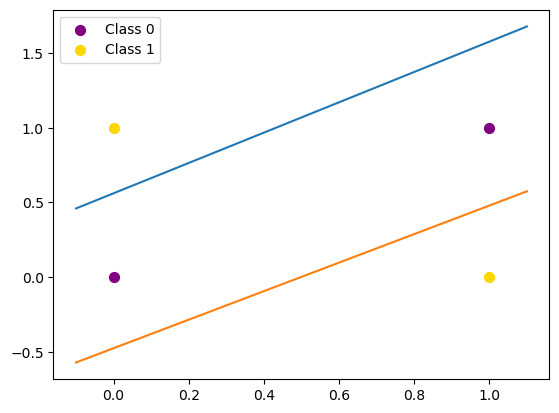

In [30]:
model_params = list(model.parameters())
model_weights = model_params[0].data.numpy()
model_bias = model_params[1].data.numpy()

plt.scatter(X.numpy()[[0,-1], 0], X.numpy()[[0, -1], 1], c = 'purple', s = 50)
plt.scatter(X.numpy()[[1,2], 0], X.numpy()[[1, 2], 1], c = 'gold', s = 50)

x_1 = np.arange(-0.1, 1.1, 0.1)
y_1 = ((x_1 * model_weights[0,0]) + model_bias[0]) / (-model_weights[0,1])
plt.plot(x_1, y_1)

x_2 = np.arange(-0.1, 1.1, 0.1)
y_2 = ((x_2 * model_weights[1,0]) + model_bias[1]) / (-model_weights[1,1])
plt.plot(x_2, y_2)
plt.legend(["Class 0", "Class 1"], loc = "best")
plt.show()